# Exploratory Data Analysis on Iris Dataset

In [26]:
#import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

sns.set()

In [27]:
#read csv

df = pd.read_csv("iris-data.csv")

In [28]:
#copy the data (This is to ensure that we do not lose our original data)

iris_data = df.copy()

In [29]:
#Get an overview of the data

#first 10 rows
iris_data.head(10)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [30]:
#last 10 rows

iris_data.tail(10)

,sepal-length,sepal-width,petal-length,petal-width,class
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [31]:
#shape of the dataset

iris_data.shape

(150, 5)

## Data Cleaning

In [32]:
#info of the dataset

iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3    petal-width  150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Data types are correct.
Four numerical columns and One catgorical column.

In [33]:
# column names

iris_data.columns

Index(['sepal-length', 'sepal-width', 'petal-length', ' petal-width', 'class'], dtype='object')

In [34]:
# check for null values

iris_data.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
 petal-width    0
class           0
dtype: int64

No null values found.

In [35]:
# check for duplicate values

iris_data.duplicated().sum()

3

3 duplicate values found. It is important to check if the dataset is balanced or not.

In [36]:
#view the duplicated rows

iris_data[iris_data.duplicated()]

,sepal-length,sepal-width,petal-length,petal-width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [37]:
# check if the dataset is balanced or not

iris_data.value_counts('class')

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Dataset is balanced so remeoving duplicates might affect it.

In [39]:
#Removing "Iris-" from "class" column

iris_data['class'] = iris_data['class'].str.replace('Iris-', '')

In [40]:
iris_data['class']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: object

In [52]:
#remove any whitespaces in column names

iris_data = iris_data.rename(columns={col: col.strip() for col in iris_data.columns})

In [54]:
iris_data.columns

Index(['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class'], dtype='object')

## Statistical summary

In [38]:
iris_data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis

#### Average values by Iris Class

        class  sepal-length  sepal-width  petal-length  petal-width
0      setosa         5.006        3.418         1.464        0.244
1  versicolor         5.936        2.770         4.260        1.326
2   virginica         6.588        2.974         5.552        2.026


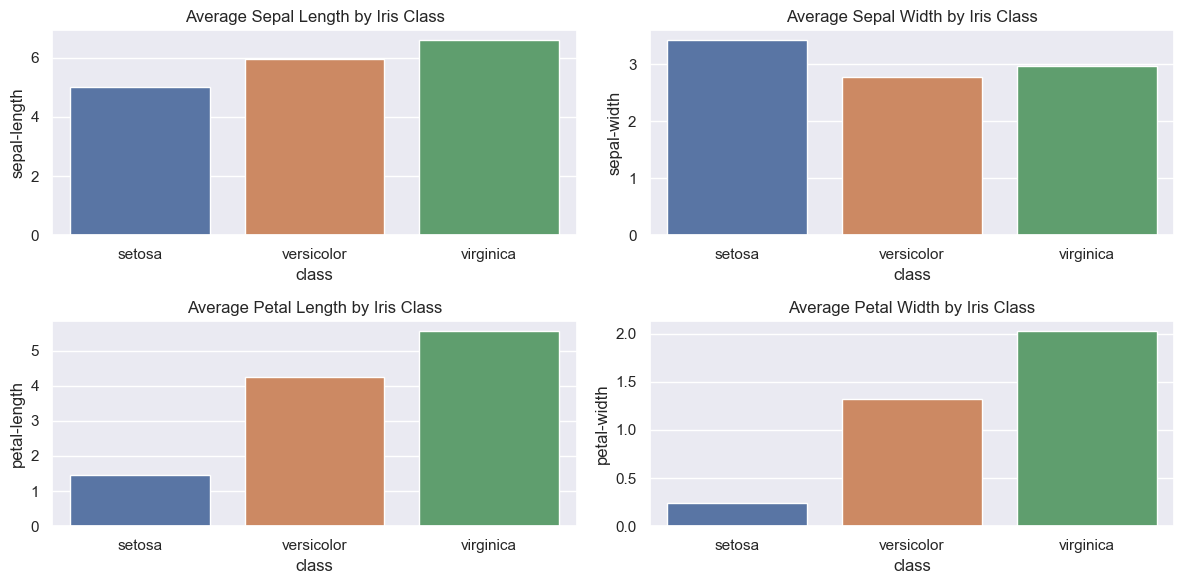

In [56]:
# Calculate average values for each column
average_values = iris_data.groupby('class').mean().reset_index()

#setting up the plotting area
plt.figure(figsize = (12,6))

# Plot average sepal length
plt.subplot(2, 2, 1)
sns.barplot(data=average_values, x='class', y='sepal-length')
plt.title('Average Sepal Length by Iris Class')

# Plot average sepal width
plt.subplot(2, 2, 2)
sns.barplot(data=average_values, x='class', y='sepal-width')
plt.title('Average Sepal Width by Iris Class')

# Plot average petal length
plt.subplot(2, 2, 3)
sns.barplot(data=average_values, x='class', y='petal-length')
plt.title('Average Petal Length by Iris Class')

# Plot average petal length
plt.subplot(2, 2, 4)
sns.barplot(data=average_values, x='class', y='petal-width')
plt.title('Average Petal Width by Iris Class')

print(average_values)
plt.tight_layout()
plt.show()

***INSIGHTS***

1. **Sepal and Petal Dimensions by Class**:
   - On average, the sepal length of the "virginica" class is the longest (6.588), followed by "versicolor" (5.936) and "setosa" (5.006).
   - The sepal widths are relatively similar across the classes, with "virginica" having slightly wider sepals (2.974) compared to "versicolor" (2.770) and "setosa" (3.418).
   - In terms of petal dimensions, both petal length and width show a clear trend of increasing values from "setosa" to "virginica". "Virginica" has the longest and widest petals on average, followed by "versicolor" and "setosa".

2. **Class Discrimination**:
   - The differences in sepal and petal dimensions among the classes suggest that these features could be useful in discriminating between different iris species.
   - For example, "setosa" typically has shorter and wider sepals, as well as shorter and narrower petals compared to "versicolor" and "virginica". This suggests that sepal and petal dimensions could be indicative features for species classification.

3. **Feature Importance**:
   - Among the dimensions, petal length and width appear to have more significant differences across the classes compared to sepal length and width. This indicates that petal measurements might be more informative features for distinguishing between iris species.


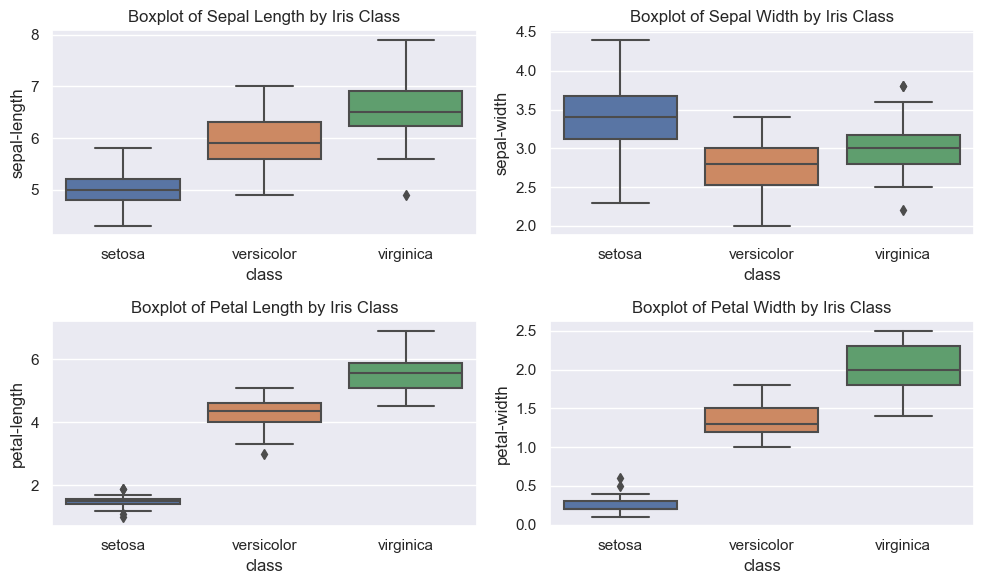

In [59]:
plt.figure(figsize=(10, 6))

# Plot average sepal length
plt.subplot(2, 2, 1)
sns.boxplot(data=iris_data, x='class', y='sepal-length')
plt.title('Boxplot of Sepal Length by Iris Class')

# Plot average sepal width
plt.subplot(2, 2, 2)
sns.boxplot(data=iris_data, x='class', y='sepal-width')
plt.title('Boxplot of Sepal Width by Iris Class')

# Plot average petal length
plt.subplot(2, 2, 3)
sns.boxplot(data=iris_data, x='class', y='petal-length')
plt.title('Boxplot of Petal Length by Iris Class')

# Plot average petal length
plt.subplot(2, 2, 4)
sns.boxplot(data=iris_data, x='class', y='petal-width')
plt.title('Boxplot of Petal Width by Iris Class')

plt.tight_layout()
plt.show()


***INSIGHTS***

1. **Setosa**:
   - Setosa exhibits smaller features compared to other classes.
   - The distribution of Setosa's features is less spread out, indicating less variability among observations.

2. **Versicolor**:
   - Versicolor shows average feature sizes compared to other classes.
   - The distribution of Versicolor's features is relatively moderate, suggesting moderate variability among observations.

3. **Virginica**:
   - Virginica displays larger features compared to other classes.
   - The distribution of Virginica's features is highly spread out, with a large number of values, indicating significant variability among observations.

These insights provide a clear understanding of the differences in feature sizes and distributions among the three classes of iris flowers. 

### Classification feature as petal-length and petal-width

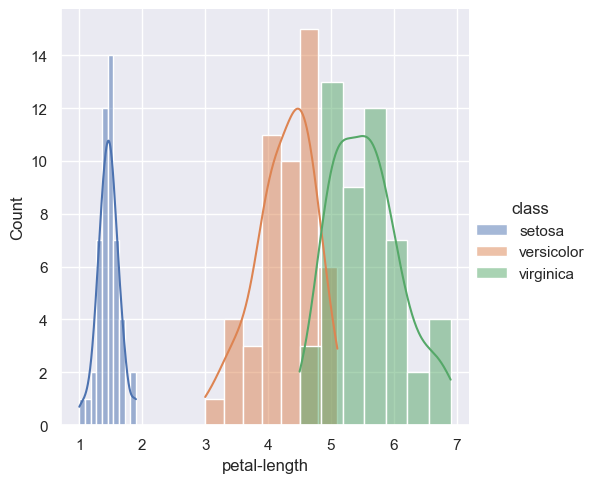

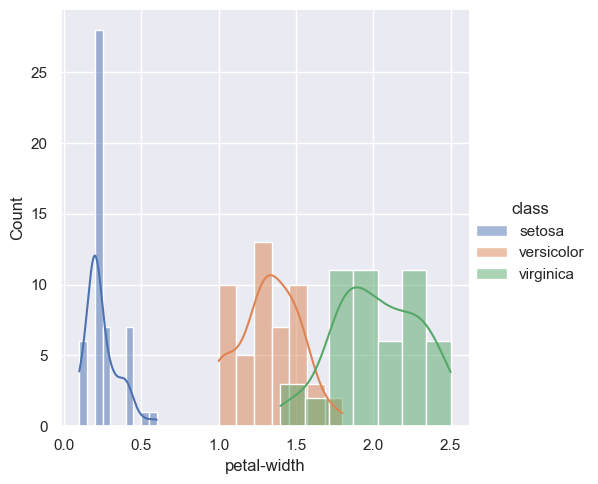

Min:             petal-length  petal-width
class                                
setosa               1.0          0.1
versicolor           3.0          1.0
virginica            4.5          1.4
Max:             petal-length  petal-width
class                                
setosa               1.9          0.6
versicolor           5.1          1.8
virginica            6.9          2.5


In [79]:
# Create the first FacetGrid for the "petal-length" column
g1 = sns.FacetGrid(iris_data, hue="class", height=5)
g1.map(sns.histplot, "petal-length", kde=True)
g1.add_legend()

# Create the second FacetGrid for the "petal-width" column
g2 = sns.FacetGrid(iris_data, hue="class", height=5)
g2.map(sns.histplot, "petal-width", kde=True)
g2.add_legend()

# Show the plots
plt.show()

print("Min:" , iris_data.groupby('class')[['petal-length','petal-width']].min())

print("Max:" , iris_data.groupby('class')[['petal-length','petal-width']].max())

## We can make the following classification:

1. **Setosa**:
   - Petal length ranges from 1.0 to 1.9 units, with a maximum width of 0.6 units.
   - Setosa has the smallest petal dimensions among all classes, with a narrow range of values.

2. **Versicolor**:
   - Petal length ranges from 3.0 to 5.1 units, with a maximum width of 1.8 units.
   - Versicolor exhibits moderate petal dimensions, with a wider range compared to Setosa but narrower compared to Virginica.

3. **Virginica**:
   - Petal length ranges from 4.5 to 6.9 units, with a maximum width of 2.5 units.
   - Virginica has the largest petal dimensions among all classes, with the widest range of values.




<h3>Classification:</h3>


**Setosa Classification**:
   - Petal Length ≤ 1.9 units and Petal Width ≤ 0.6 units

**Versicolor Classification**:
   - 1.9 < Petal Length ≤ 5.1 units and 0.6 < Petal Width ≤ 1.8 units

**Virginica Classification**:
   - Petal Length > 5.1 units and Petal Width > 1.8 units
